In [3]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("train.csv")

df.sample(10)

,id,keyword,location,text,target
6625,9489,terrorism,NaN,Online Homeland security: An Appraisal of #Pak...,0
7130,10213,volcano,NaN,Maailiss: Diaporama : sixpenceee: Karymsky Lak...,0
2853,4100,drought,NaN,U.S. in record hurricane drought http://t.co/8...,1
4380,6222,hijacker,"Fresno, California",Governor allows parole for California school b...,1
2179,3123,debris,Seattle,#love #food #fun Malaysian Prime Minister Naji...,1
6932,9942,trouble,NaN,@_charleyisqueen Yeah well maybe if the barber...,0
886,1282,bloody,Malaysia,aggressif is so bloody aggressive,0
5665,8084,rescue,"Toronto, Ontario",UD: Rescue (Structural Collapse) - Scott Road ...,1
2796,4022,disaster,"Philadelphia, PA USA",DISASTER AVERTED: Police kill gunman with 'hoa...,1
3575,5107,famine,"Chatham, IL",Images of Famine ÛÒ Hope In Christ - A blog o...,1


Chaque ligne du Dataframe correspond à des informations d'un poste sur Twitter.

La colonne "Keyword" montre les mots clés de chaque poste, afin de les différencier.

"Location" indique une information supplémentaire au poste liée à la localisation du sujet du poste en question.

"Text" contient le contenu du poste Twitter.

In [5]:
df.shape

(7613, 5)

In [6]:
df.duplicated().unique()

array([False])

Il n'y a aucune valeur dupliquée

In [7]:
print(df["id"].isna().unique())

print(df["keyword"].isna().unique())

print(df["location"].isna().unique())

print(df["text"].isna().unique())

print(df["target"].isna().unique())

[False]
[ True False]
[ True False]
[False]
[False]


Les colonnes Keyword et Location ont des valeurs NaN

In [8]:
df["keyword"].isna().sum()

61

In [9]:
df["location"].isna().sum()

2533

In [10]:
df[df["target"] == 1].sample(10)

,id,keyword,location,text,target
4203,5966,hazard,Dil's Campsite,@Dead_Dreamer15 ...because if it were on fire ...,1
5802,8283,rioting,"Colonial Heights, VA",@halljh1720. I am so sick of criminals parents...,1
3525,5039,eyewitness,"Bakersfield, California",Wake Up Kern County Eyewitness News Mornings a...,1
2935,4218,drowned,Dubai,Migrants drown at sea after boat capsizes off ...,1
7339,10506,wildfire,NaN,Wildfire Burns On California U.s. China Econom...,1
1234,1775,buildings%20on%20fire,"Manchester, NH",Fire destroys two buildings on 2nd Street in #...,1
7465,10681,wounds,"Paterson, New Jersey",Driver rams car into Israeli soldiers wounds 3...,1
391,565,arson,Republic of Texas,Arson suspect linked to 30 fires caught in Nor...,1
4351,6181,hijack,NaN,Swansea Û÷plot hijack transfer move for South...,1
1980,2851,cyclone,NaN,#Rohingya houses in #Kyee NockThie hamlet from...,1


In [29]:
df[df["target"] == 0].sample(10)

,id,keyword,location,text,target,character_count
2958,4250,drowning,New York,The Drowning Girl by Caitlin R. Kiernan Centip...,0,138
1656,2391,collapsed,San Francisco Bay Area,My @Quora answer to Why do my answers get coll...,0,93
5892,8414,sandstorm,NaN,Who need friends when there's booze and Darude...,0,61
848,1228,blizzard,United States,@LoneWolffur BRUH *dies*,0,24
2913,4182,drown,it's a journey,Don't think for one second I'm out to drown yo...,0,90
5858,8369,ruin,New York - Connecticut,Damn Wale knows how to ruin a song??,0,36
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0,53
782,1132,blight,Sydney,As a cycling fan I feel sorry for world athlet...,0,139
4165,5918,harm,å_: ?? ÌÑ ? : ?,someone just reblogged a picture of self harm ...,0,82
6841,9800,trapped,Like us on Face,Hollywood Movie About Trapped Miners Released ...,0,136


Les colonnes qui vont nous intéresser sont: "Keyword", "Text" et "Target".

Target = 1 rassemble les postes qui parlent d'accidents, alors que Target = 0 parle d'autres sujets.

Text est important pour avoir accès au contenu des postes, ce qui nous servira à chercher les mots clés intéressants ou non à garder.

Keyword est aussi important pour déterminer quels mots clés ont été gardés pour quel postes, ce qui nous permets de garder uniquement les mots clés qui nous permettra de chercher les postes parlant d'accidents plus efficacement.

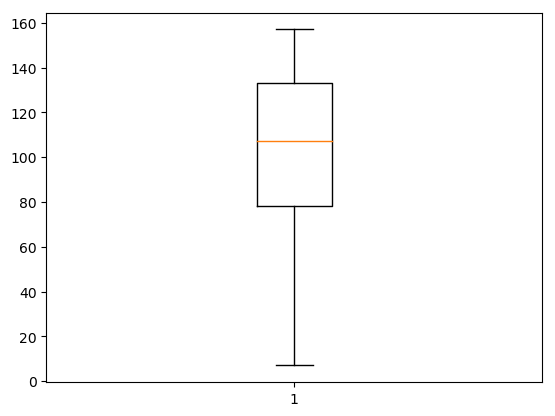

In [12]:
df["character_count"] = df["text"].apply(len)
plt.boxplot(df["character_count"])
plt.show()

In [15]:
target1Count = df[df["target"] == 1].count()
target0Count = df[df["target"] == 0].count()

print(target1Count / target0Count)

id                 0.753339
keyword            0.746935
location           0.761442
text               0.753339
target             0.753339
character_count    0.753339
dtype: float64


On trouve que environs 75% des posts parlent de catastrophes.